In [1]:
#IBM HR Analytics


import warnings
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

data=pd.read_csv('/content/IBM HR Analytics employee.csv')
pd.set_option('display.max_columns', 35)
print(data.columns)

print(data.dtypes)

print(data.head)




Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeC

In [ ]:
#Checking null values in dataset
has_nulls = data.isnull().values.any()
print( has_nulls)

#Checking duplicate values in dataset
has_duplicate = data.duplicated().sum()
print( has_duplicate)

False
0


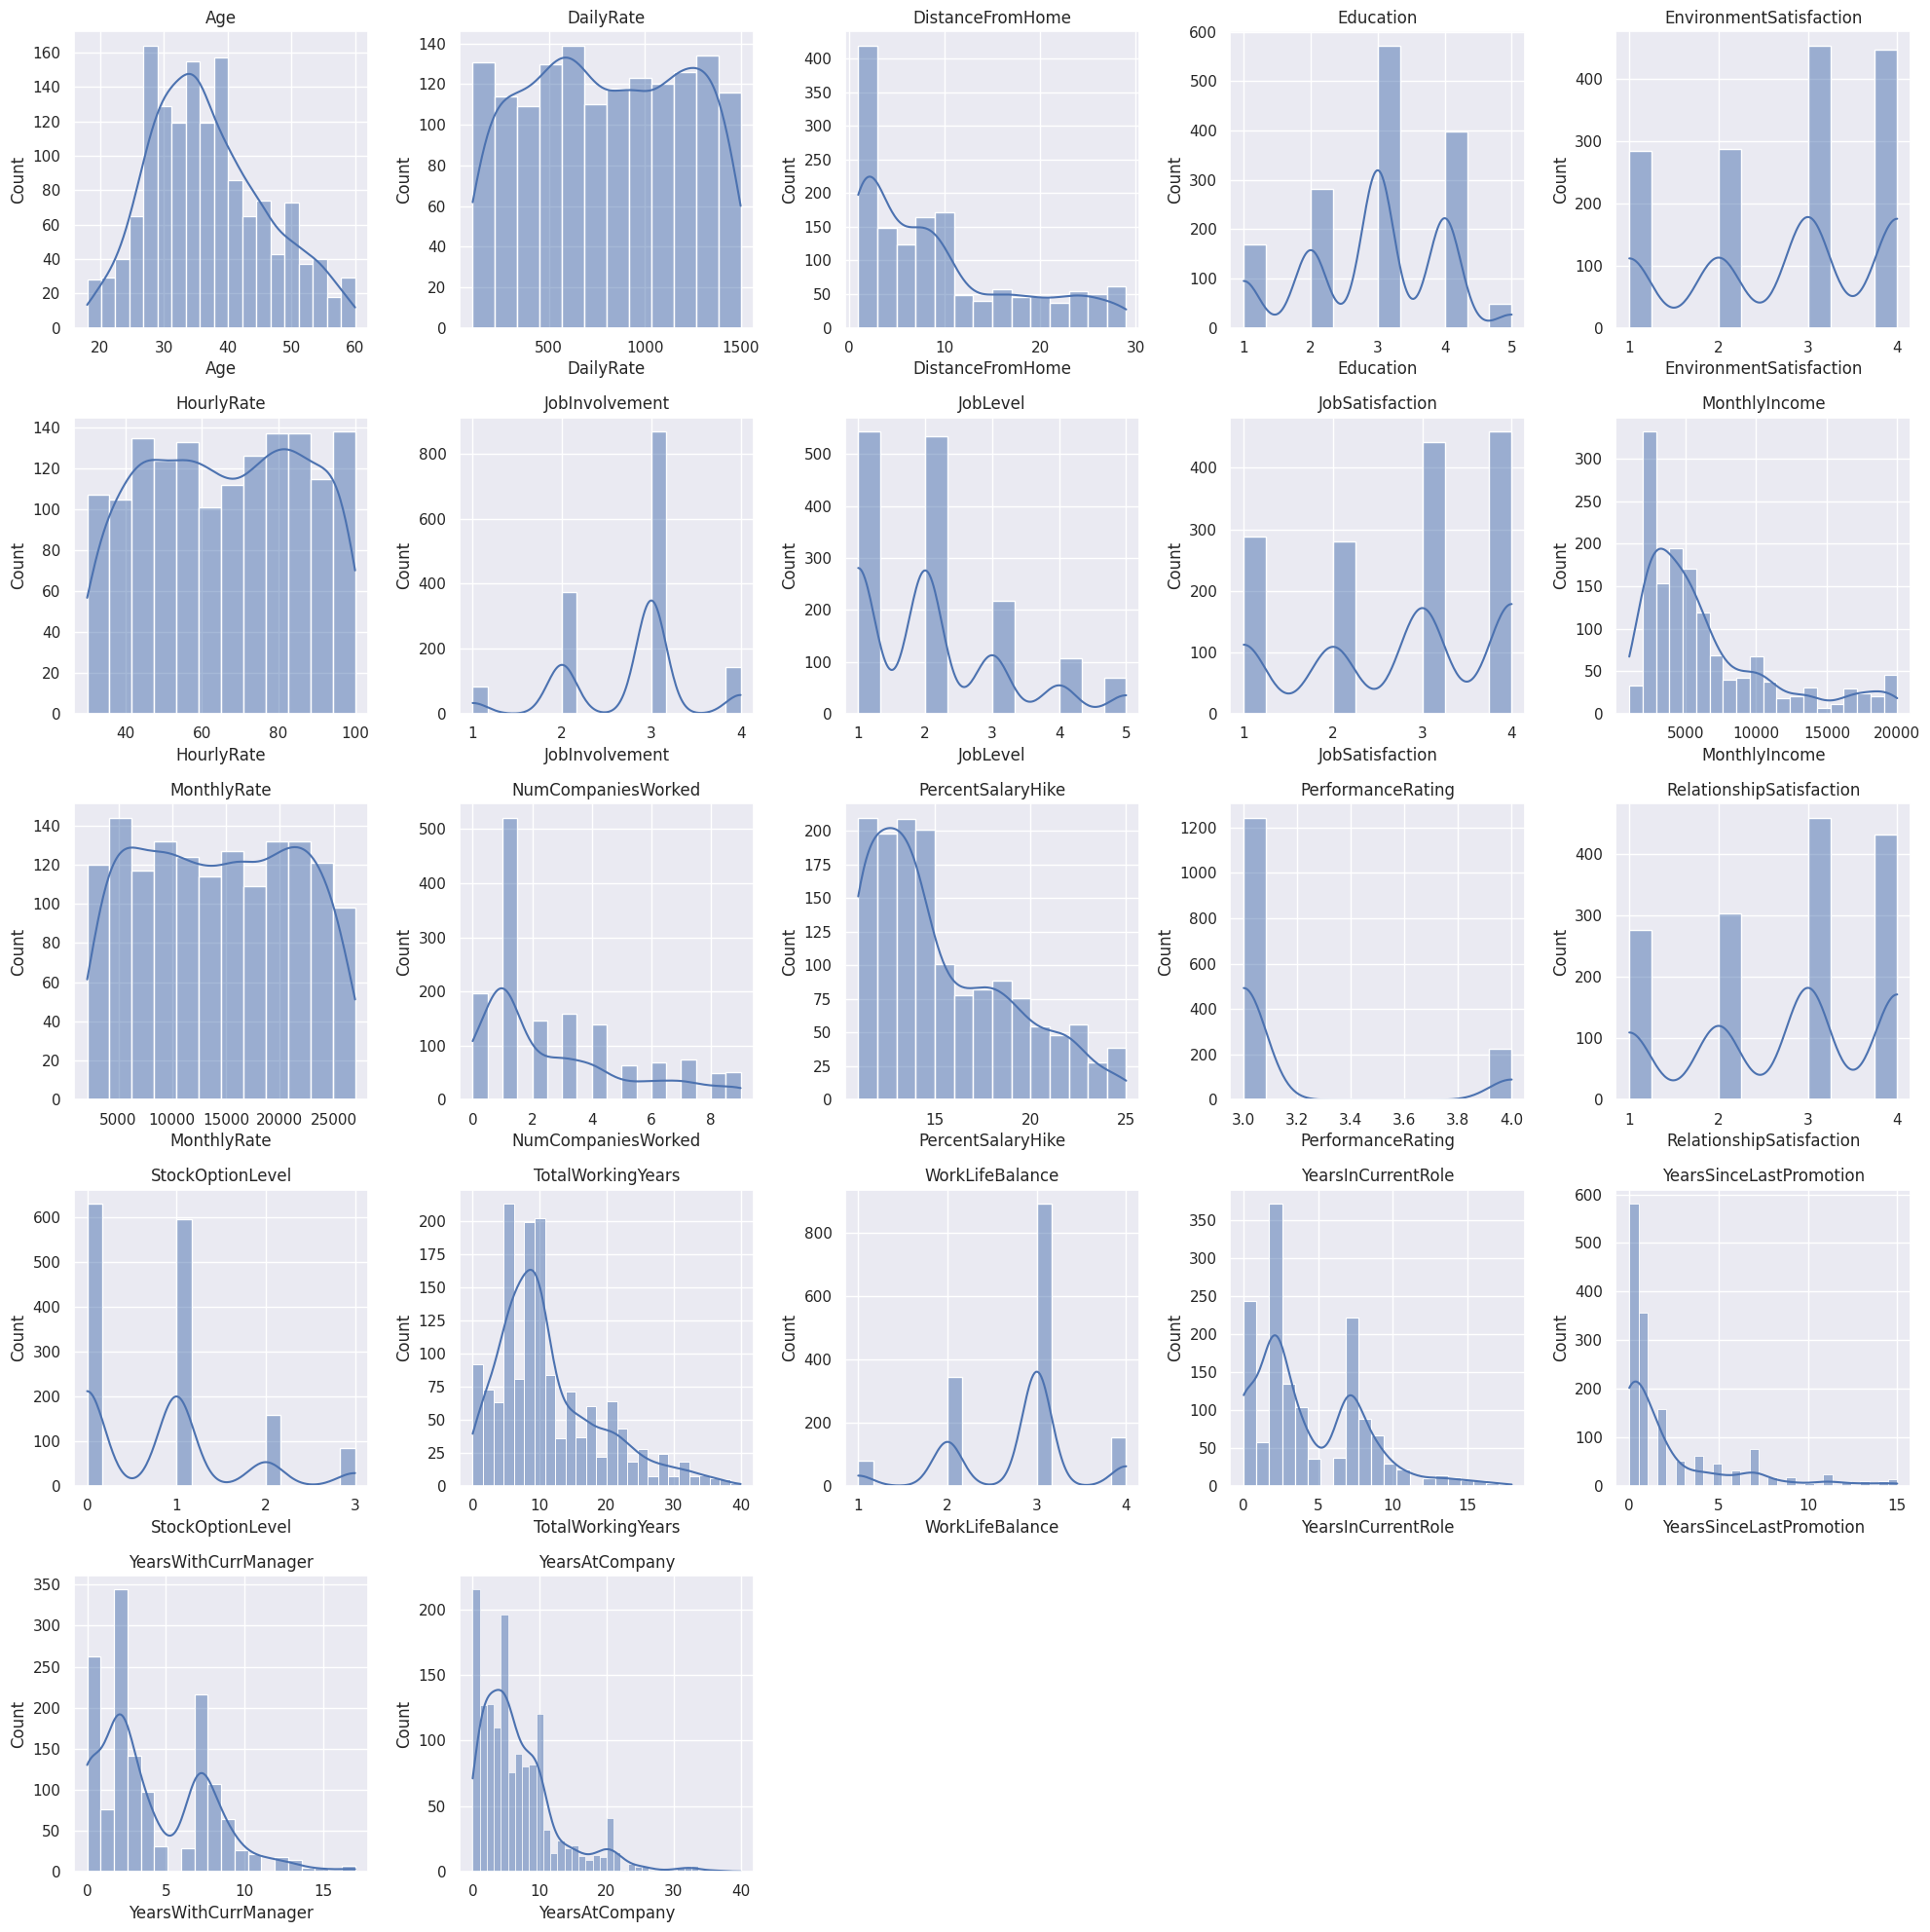

In [12]:
# Data Distribution

import matplotlib.pyplot as plt
import seaborn as sb


col = [
    'Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
    'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
    'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
    'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','WorkLifeBalance',
    'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','YearsAtCompany'
]


plt.figure(figsize=(20, 20))


for i, c in enumerate(col):
    plt.subplot(5, 5, i+1)
    sb.histplot(data=data, x=c, kde=True)
    plt.title(c)


plt.tight_layout()


plt.show()

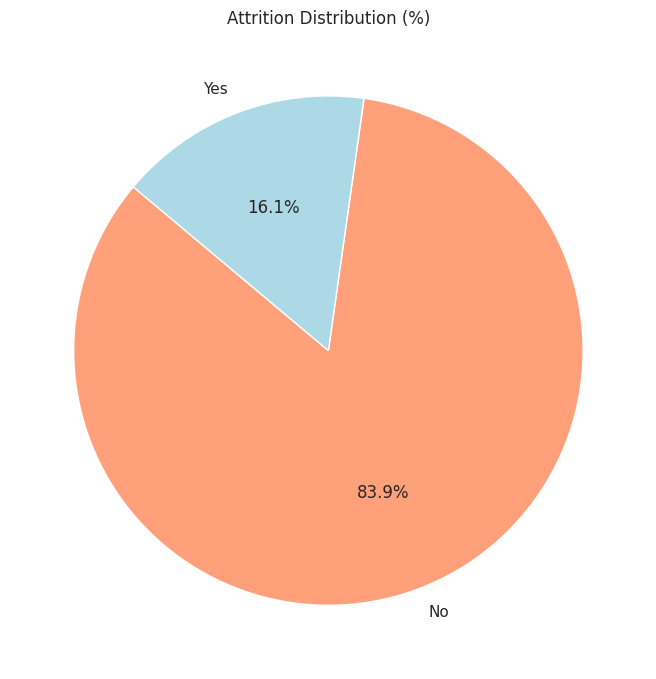

In [34]:
() # Exploratory Data Analytics
   # Calculating Attrition Rate -The attrition rate measures the percentage of employees who leave the company in a given period
   # of time. It is usually calculated within a year and is expressed as a percentage of the total number of employees.

import matplotlib.pyplot as plt

# Calculate percentages
attrition_percentages = data['Attrition'].value_counts(normalize=True) * 100

# Create the pie chart
attrition_percentages.plot(kind='pie', colors=['lightsalmon', 'lightblue'], autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Attrition Distribution (%)')

# Display the pie chart
plt.ylabel('')
plt.show()

# Hence we can see 16% employee leave the organization, while 84% employee stays


7.0081632653061225


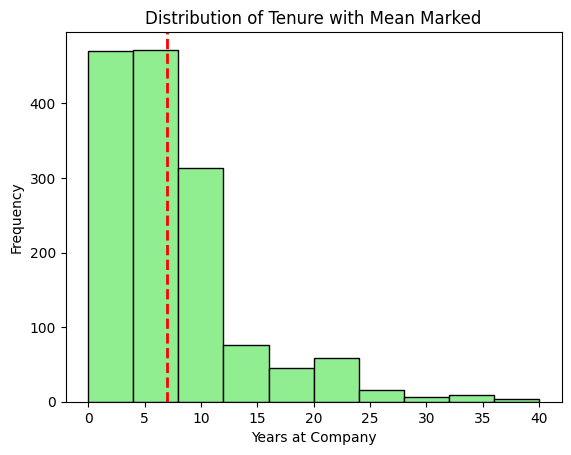

In [ ]:
# Averge of Tenure- The average tenure measures the average number of years an employee stays with the company before leaving.

avg_tenure = data['YearsAtCompany'].mean()
print( avg_tenure)


import numpy as np

avg_tenure = data['YearsAtCompany'].mean()

plt.hist(data['YearsAtCompany'], bins=10, color='lightgreen', edgecolor='black')
plt.axvline(avg_tenure, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure with Mean Marked')
plt.show()

# The graph represents most employee stays with the company for atleast 7 years before leaving the organization.







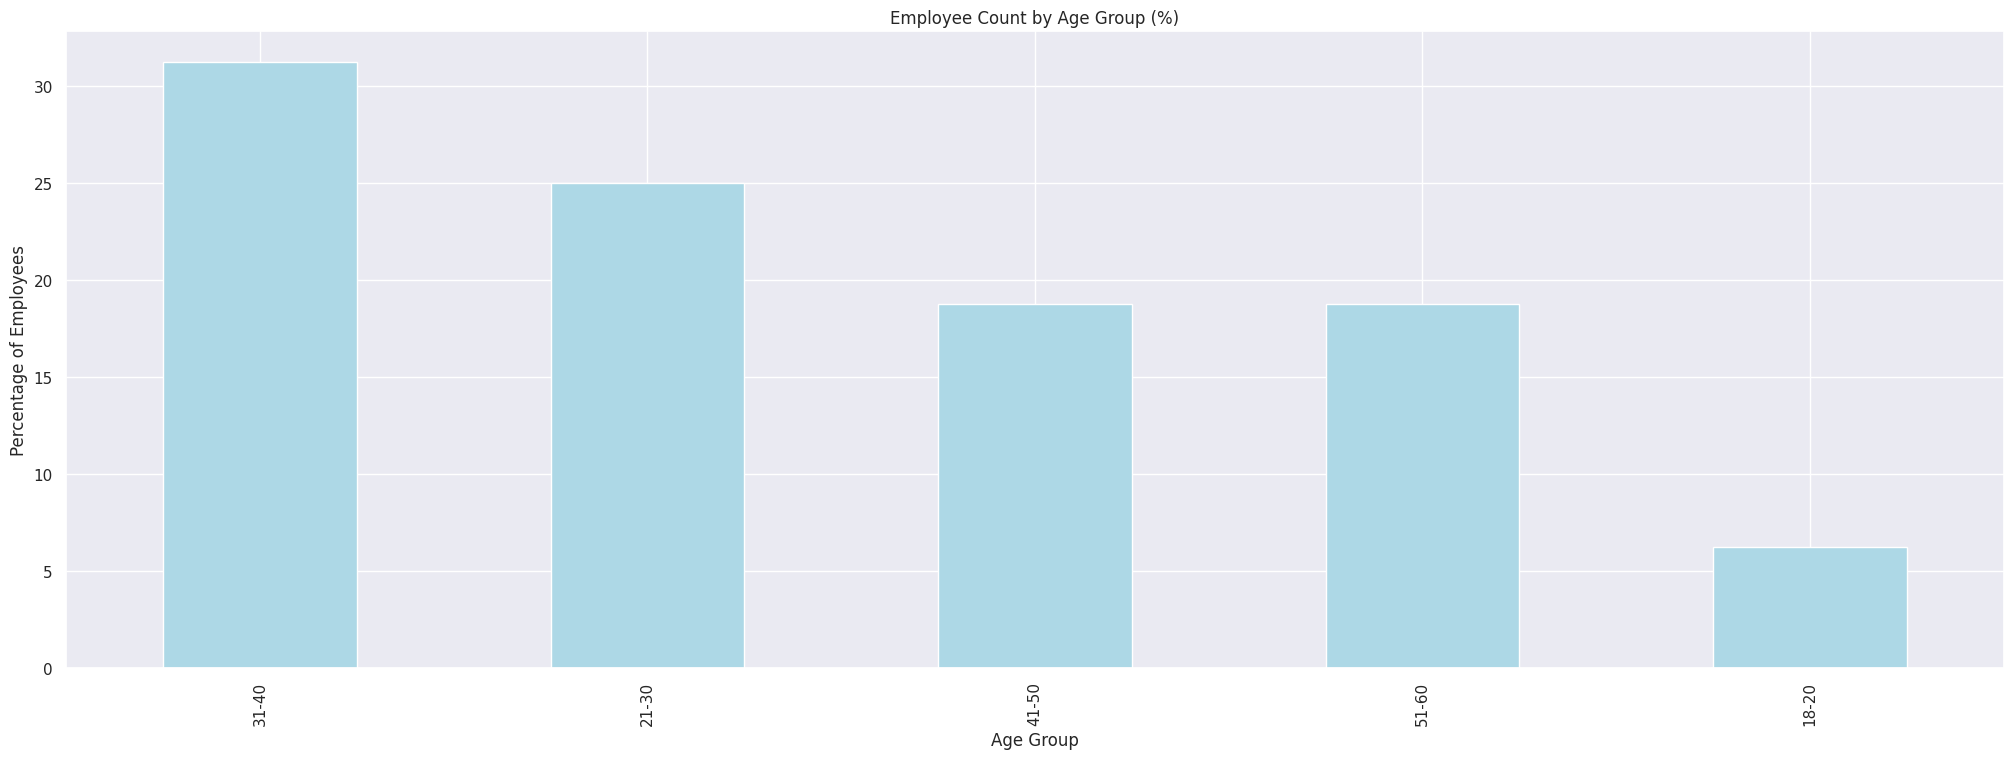

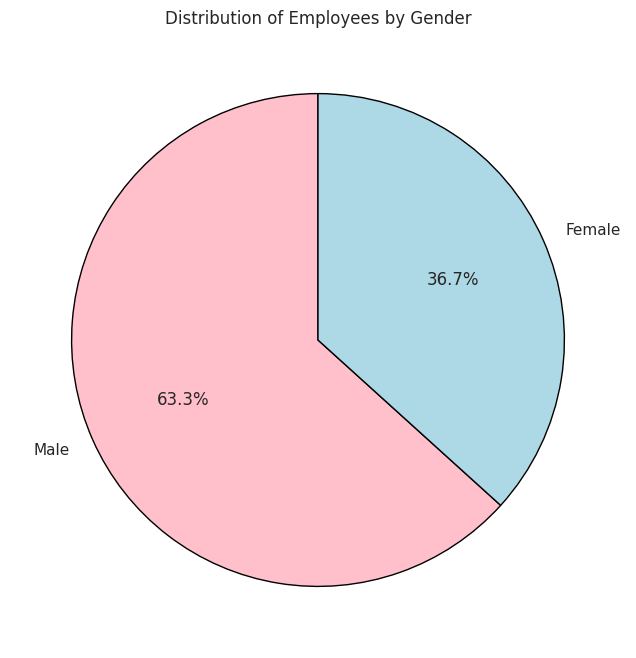

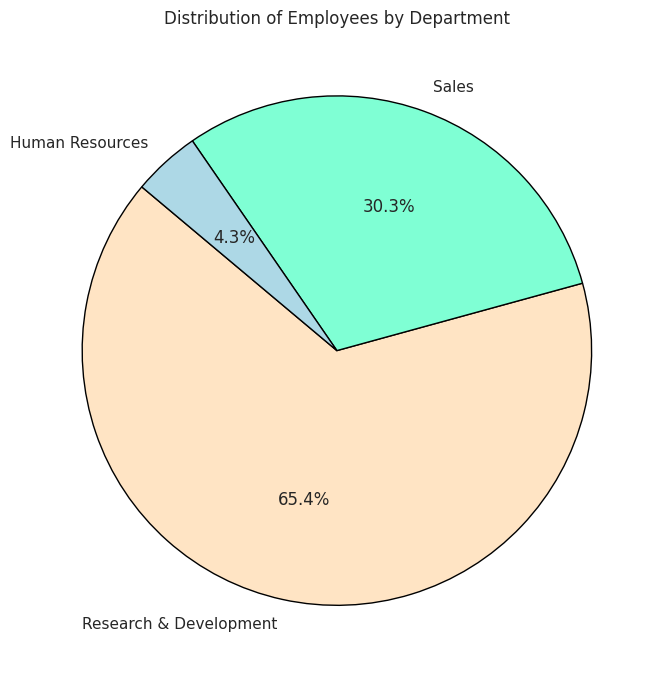

In [33]:
 #Employee's Demographics

#Histogram of Employee Age Distribution
import pandas as pd
import matplotlib.pyplot as plt
emp_df = pd.DataFrame({
    'Age': [22, 28, 35, 40, 45, 52, 58, 34, 21, 50, 26, 31, 43, 38, 60, 19]
})

age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60']

emp_df['age_group'] = pd.cut(emp_df['Age'], bins=[18, 20, 30, 40, 50, 60], labels=age_labels, right=True)


emp_df['age_group'].value_counts(normalize=True).mul(100).plot(kind='bar', color='lightblue')


plt.title("Employee Count by Age Group (%)")
plt.xlabel('Age Group')
plt.ylabel('Percentage of Employees')

plt.show()


# The graph shows most of the employee are of age group between 31-40, with min age of 18 amd max of 60.





 #Barplot of Employee gender Distribution
import matplotlib.pyplot as plt

# Assuming gender_counts has been calculated as:
# gender_counts = data['Gender'].value_counts()

colors = ['pink', 'lightblue']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Employees by Gender')
plt.show()


# Most of the employee of the organization are male .





# Plot for department and count
department_counts = data['Department'].value_counts()
colors = ['bisque', 'aquamarine', 'lightblue']
plt.pie(department_counts, labels=department_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Employees by Department')
plt.show()

# The graph represents most of the employees  work in R and D department, followed by sales and HR department.



In [ ]:
# Fetching data who have left the company.

data_attrition = data.query("Attrition == 'Yes'")
data_attrition.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


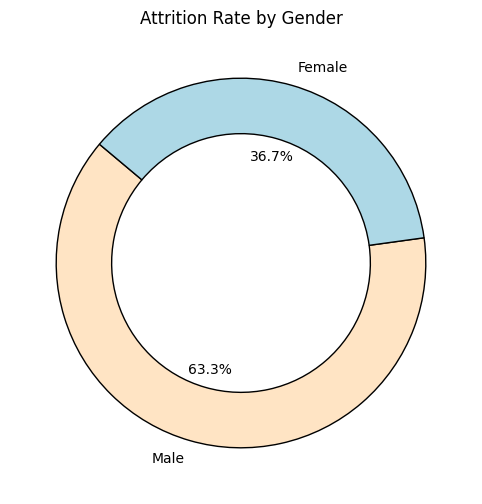

In [2]:
 import matplotlib.pyplot as plt

# Filter the data to include only rows where 'Attrition' is 'Yes'
data_attrition_yes = data[data['Attrition'] == 'Yes']

# Calculate the count of attrition by gender
gender_counts = data_attrition_yes['Gender'].value_counts()

# Define the colors for the donut chart
colors = ['bisque', 'lightblue']

# Create the donut chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black', 'width': 0.3})

# Add a title
plt.title('Attrition Rate by Gender')

# Show the plot
plt.show()

# This concludes most 63% males and 37% females have left the company.





AgeGroup
18-24    39.175258
25-34    20.216606
35-44    10.099010
45-54    10.204082
55-64    15.942029
Name: Attrition_Numeric, dtype: float64


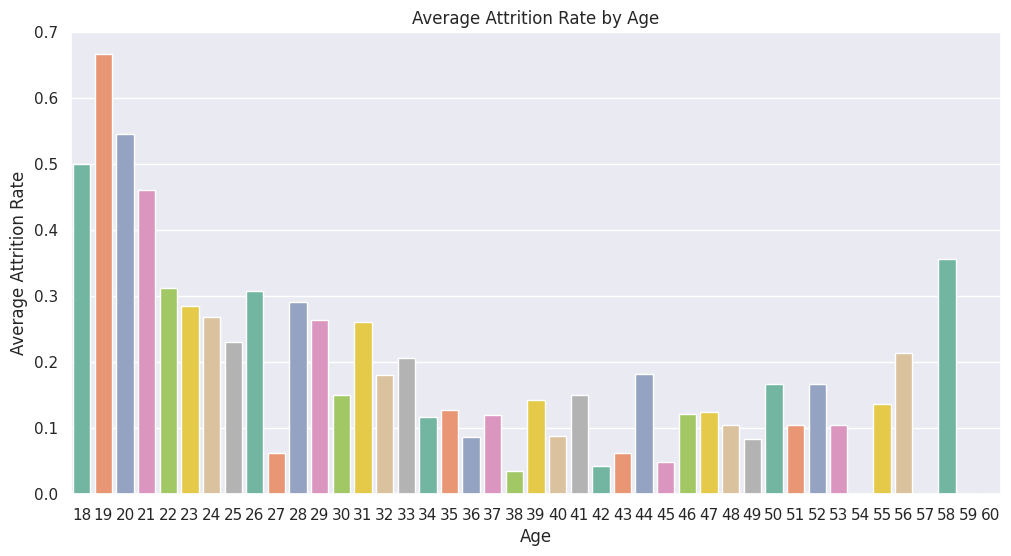

In [18]:
 # Attrition rate by Age
 # Calculating attrition by age group

import pandas as pd

# Define bins and labels
bins = [18, 25, 35, 45, 55, 65]  # Adjust bins as needed
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']  # Adjust labels accordingly

# Bin the 'Age' column
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Convert Attrition to numeric (1 for 'Yes', 0 for 'No')
data['Attrition_Numeric'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Calculate attrition rate by age group
attrition_by_age_group = data.groupby('AgeGroup')['Attrition_Numeric'].mean() * 100

print(attrition_by_age_group)


# Visualizing the  attrition by age

import seaborn as sns
import matplotlib.pyplot as plt

# Convert Attrition column to numeric (1 for 'Yes', 0 for 'No')
data['Attrition_Numeric'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Aggregate data: calculate the mean attrition rate by age
age_attrition = data.groupby('Age')['Attrition_Numeric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Attrition_Numeric', data=age_attrition, palette='Set2')


plt.xlabel('Age')
plt.ylabel('Average Attrition Rate')
plt.title('Average Attrition Rate by Age')

plt.show()

# As per the visualization, we can conclude people with age 18-24 shows higher attrition rate.


  IncomeGroup  Attrition Rate
0        0-3k       28.607595
1       3k-6k       12.716763
2       6k-9k       10.762332
3      9k-12k       16.666667
4     12k-15k        9.677419
5     15k-20k        3.759398


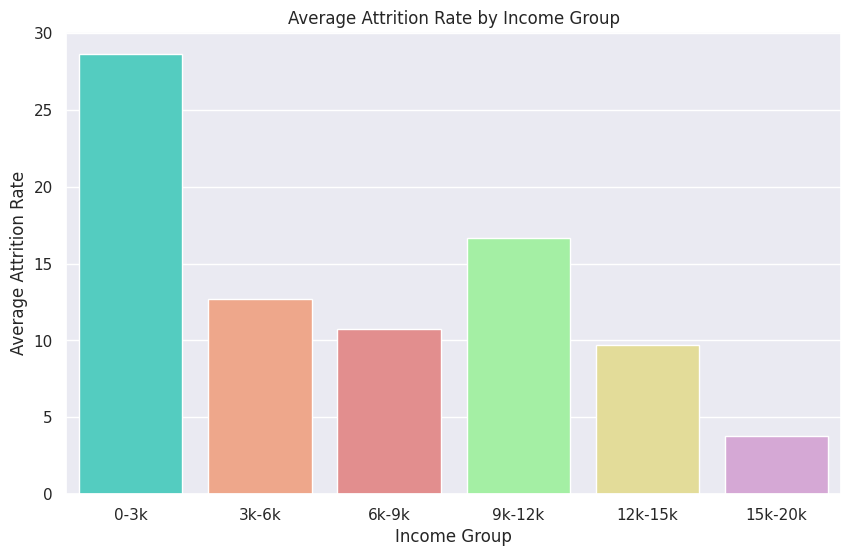

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define your income bins and labels
income_bins = [0, 3000, 6000, 9000, 12000, 15000, 20000]
income_labels = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k-20k']

# Create the 'IncomeGroup' column
data['IncomeGroup'] = pd.cut(data['MonthlyIncome'], bins=income_bins, labels=income_labels, right=False)

# Calculate attrition rate by income group
attrition_by_income_group = data.groupby('IncomeGroup')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='Attrition Rate')

# Display the result
print(attrition_by_income_group)

# Define a custom color palette similar to the specified shades
custom_palette = sns.color_palette(['#40E0D0', '#FFA07A', '#F08080', '#98FB98', '#F0E68C', '#DDA0DD'])

plt.figure(figsize=(10, 6))

# Use the custom palette in the barplot
sns.barplot(x='IncomeGroup', y='Attrition Rate', data=attrition_by_income_group, palette=custom_palette)

plt.xlabel('Income Group')
plt.ylabel('Average Attrition Rate')
plt.title('Average Attrition Rate by Income Group')

plt.show()



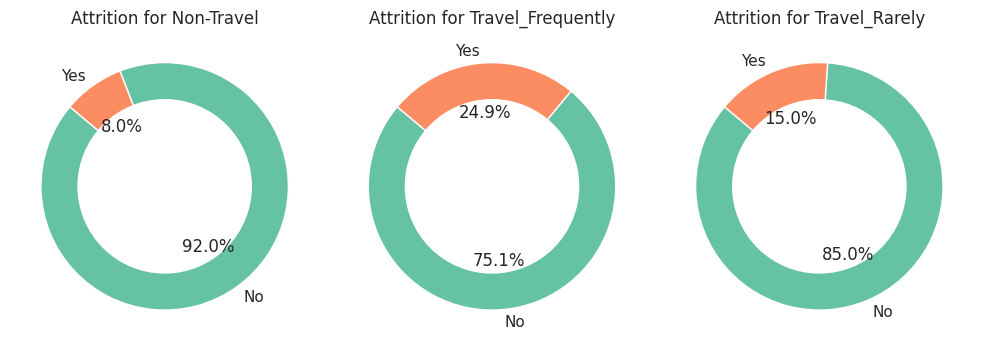

In [15]:
# Attrition by travel

import matplotlib.pyplot as plt


attrition_by_travel = data.groupby(['BusinessTravel', 'Attrition']).size().unstack()


fig, ax = plt.subplots(1, 3, figsize=(10, 6))


colors = ['#66c2a5', '#fc8d62']


for i, travel in enumerate(attrition_by_travel.index):
    ax[i].pie(attrition_by_travel.loc[travel], labels=attrition_by_travel.columns, autopct='%1.1f%%', startangle=140, colors=colors)

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax[i].add_artist(centre_circle)
    ax[i].set_title(f'Attrition for {travel}')


plt.tight_layout()
plt.show()

# People who travel frequently shows maximum attrition rate with 24.9%, while do not travel shows minimum attrition rate of 8%.



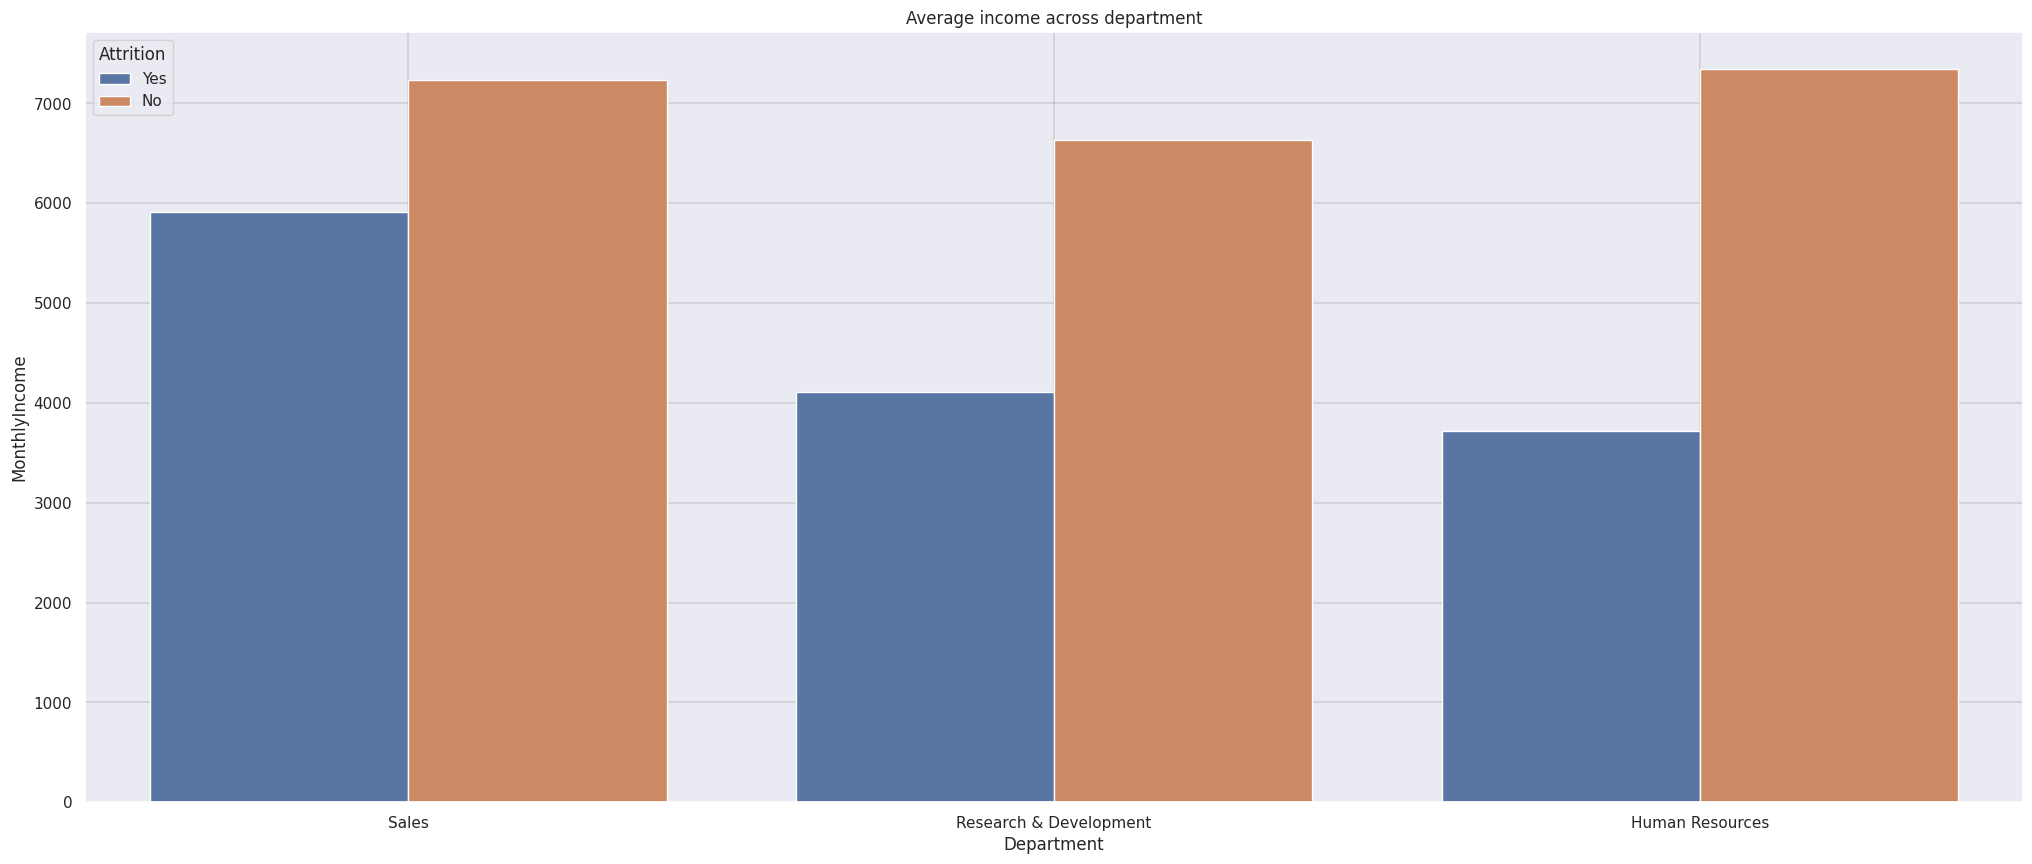

In [44]:
# Plotting average income of employees across department.


import seaborn as sb
import matplotlib.pyplot as plt

color = ['red', 'orange', 'blue', 'purple']

bplot = sb.barplot(data=data,
            x="Department",
            y="MonthlyIncome",
            hue="Attrition",
            ci=None,

            )
sb.set(rc={'figure.figsize':(15,10)})
plt.title("Average income across department")
#plt.ylabel("Fare (pounds)")
plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")




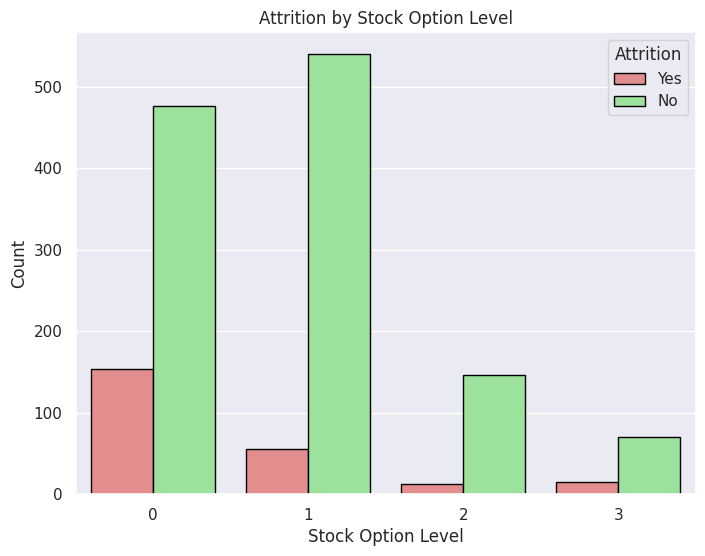

In [35]:
# Attrition by Stock Level
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=data, palette=['lightcoral', 'lightgreen'], edgecolor='black')

plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.title('Attrition by Stock Option Level')
plt.legend(title='Attrition', loc='upper right')
plt.show()


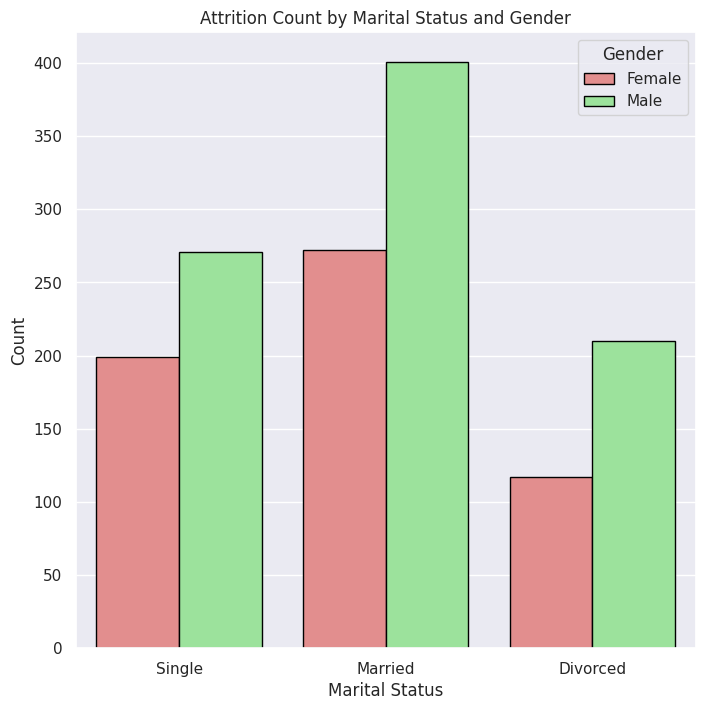

In [42]:
# Attrition by Marital Status.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data'
plt.figure(figsize=(8, 8))

# Create a grouped bar plot
sns.countplot(x='MaritalStatus', hue='Gender', data=data, palette=['lightcoral', 'lightgreen'], edgecolor='black')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Attrition Count by Marital Status and Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Most of the maaried employees tend to leave the company.


In [ ]:
# Condudcting Hypothesis test on Attrition Rate based on Marital status

import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['MaritalStatus'], data['Attrition'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")


alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in attrition rates based on marital status.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in attrition rates based on marital status.")

Chi-Square Statistic: 46.163676540848705
P-Value: 9.45551106034083e-11
Degrees of Freedom: 2
Expected Frequencies Table:
[[274.27959184  52.72040816]
 [564.49591837 108.50408163]
 [394.2244898   75.7755102 ]]
Reject the null hypothesis: There is a significant difference in attrition rates based on marital status.
